# Trabalho Prático de Algoritmos
#### Aluno: Luiz Henrique Romanhol Ferreira
#### Matrícula: 2018113555
### Primeiro Passo: Carregar o Dataset

In [8]:
import os
import matplotlib.pyplot as plt

def load_tsp(file_path, plotar=False):
    coord_list = []
    lines = read_file_lines(file_path)
    coord_section = False

    for line in lines:
        coord_section = process_line(line, coord_section, coord_list)

    if plotar:
        plot_graph(coord_list)

    # Adicionando o nome do arquivo ao dicionário
    result = {'file': os.path.basename(file_path)[:-4], 'vertices': coord_list}
    return result

def read_file_lines(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def process_line(line, coord_section, coord_list):
    if line.startswith("NODE_COORD_SECTION"):
        coord_section = True
    elif coord_section and line.startswith("EOF"):
        coord_section = False
    elif coord_section:
        process_coord_line(line, coord_list)

    return coord_section

def process_coord_line(line, coord_list):
    parts = line.split()
    if len(parts) < 3:
        return  # Ignorar linhas que não têm informações suficientes

    x, y = map(float, parts[1:])
    coord_list.append((x, y))

def plot_graph(data):
    coord_list = data["vertices"]
    x_values, y_values = zip(*coord_list)
    plt.scatter(x_values, y_values)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Coordinate Plot')
    plt.show()

def carregar_testes():
    # Diretório dos arquivos TSP
    dir_path = "datasets/raw/"

    # Listar todos os arquivos no diretório
    file_list = os.listdir(dir_path)

    # Filtrar apenas os arquivos com extensão .tsp
    tsp_files = [file for file in file_list if file.endswith(".tsp")]

    testes = []

    # Iterar por todos os arquivos TSP e tentar carregá-los
    for tsp_file in tsp_files:
        file_path = os.path.join(dir_path, tsp_file)
        try:
            loaded_coords = load_tsp(file_path)
            print(f"Arquivo {tsp_file} carregado com sucesso.")
            testes.append(loaded_coords)
        except Exception as e:
            print(f"Erro ao carregar o arquivo {tsp_file}: {e}")

    return testes

# Carregar os testes
testes = carregar_testes()

testes = sorted(testes, key=lambda x: len(x['vertices']))

Arquivo a280.tsp carregado com sucesso.
Arquivo berlin52.tsp carregado com sucesso.
Arquivo bier127.tsp carregado com sucesso.
Arquivo brd14051.tsp carregado com sucesso.
Arquivo ch130.tsp carregado com sucesso.
Arquivo ch150.tsp carregado com sucesso.
Arquivo d1291.tsp carregado com sucesso.
Arquivo d15112.tsp carregado com sucesso.
Arquivo d1655.tsp carregado com sucesso.
Arquivo d18512.tsp carregado com sucesso.
Arquivo d198.tsp carregado com sucesso.
Arquivo d2103.tsp carregado com sucesso.
Arquivo d493.tsp carregado com sucesso.
Arquivo d657.tsp carregado com sucesso.
Arquivo eil101.tsp carregado com sucesso.
Arquivo eil51.tsp carregado com sucesso.
Arquivo eil76.tsp carregado com sucesso.
Arquivo fl1400.tsp carregado com sucesso.
Arquivo fl1577.tsp carregado com sucesso.
Arquivo fl3795.tsp carregado com sucesso.
Arquivo fl417.tsp carregado com sucesso.
Arquivo fnl4461.tsp carregado com sucesso.
Arquivo gil262.tsp carregado com sucesso.
Arquivo kroA100.tsp carregado com sucesso.
A

### Aqui carregamos os limites que foram fornecidos na especificação do trabalho

In [9]:
# Caminho do arquivo
caminho_arquivo = 'datasets/datasets.txt'

# Abrir o arquivo e ler linhas
with open(caminho_arquivo, 'r') as arquivo:
    linhas = arquivo.readlines()

# Processar cada linha
for linha in linhas:
    # Dividir a linha em partes
    partes = linha.split()

    # Verificar se a linha contém cabeçalho
    if len(partes) == 3 and partes[2].isdigit():
        # Extrair informações
        nome_dataset = partes[0]
        limite = int(partes[2])

        # Procurar o dicionário na lista de testes
        for teste in testes:
            if teste["file"] == nome_dataset:
                # Adicionar a chave "limite"
                teste["limite"] = limite
                break
        else:
            # Se não encontrar, adicionar um novo dicionário à lista
            testes.append({"file": nome_dataset, "limite": limite})

### A seguir a implementação da função christofides()

In [14]:
import numpy as np
import networkx as nx

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def create_complete_graph(points):
    G = nx.Graph()
    n = len(points)
    
    for i in range(n):
        for j in range(i+1, n):
            distance = euclidean_distance(points[i], points[j])
            G.add_edge(i, j, weight=distance)
    
    return G

def find_odd_degree_nodes(graph):
    odd_degree_nodes = [node for node, degree in graph.degree() if degree % 2 != 0]
    return odd_degree_nodes

def minimum_weight_perfect_matching(graph, odd_nodes):
    min_weight_matching = nx.Graph()
    
    while odd_nodes:
        u = odd_nodes.pop()
        v = min(odd_nodes, key=lambda x: graph[u][x]['weight'])
        odd_nodes.remove(v)
        min_weight_matching.add_edge(u, v, weight=graph[u][v]['weight'])
    
    return min_weight_matching

def eulerian_circuit(graph):
    return list(nx.eulerian_circuit(graph))

def christofides(points):
    # Criar um grafo completamente conectado com pesos de distância euclidiana
    complete_graph = create_complete_graph(points)
    
    # Calcular a Minimum Spanning Tree (MST)
    mst = nx.minimum_spanning_tree(complete_graph)
    
    # Encontrar nós com grau ímpar
    odd_degree_nodes = find_odd_degree_nodes(mst)
    
    # Encontrar emparelhamento perfeito de peso mínimo nos nós de grau ímpar
    min_weight_matching = minimum_weight_perfect_matching(complete_graph, odd_degree_nodes)
    
    # Formar um multigrafo que combina a MST e o emparelhamento perfeito
    multigraph = nx.MultiGraph(mst)
    multigraph.add_edges_from(min_weight_matching.edges(data=True))
    
    # Encontrar circuito euleriano no multigrafo
    eulerian_circuit_edges = eulerian_circuit(multigraph)
    
    # Remover arestas duplicadas no circuito euleriano
    tour = [edge[0] for edge in eulerian_circuit_edges[:-1]] + [eulerian_circuit_edges[-1][1]]
    
    # Remover repetições no tour
    tour = list(dict.fromkeys(tour))
    
    # Calcular o comprimento do tour
    tour_length = sum(complete_graph[tour[i]][tour[i+1]]['weight'] for i in range(len(tour)-1))
    
    return tour, tour_length    

### A seguir a implementação da função twice_around_the_tree()

In [34]:
import networkx as nx
import math

def create_complete_graph(points):
    G = nx.Graph()
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = math.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)
            G.add_edge(i, j, weight=distance)
    return G

def eulerian_circuit(multigraph):
    return list(nx.eulerian_circuit(multigraph))

def twice_around_the_tree(points):
    complete_graph = create_complete_graph(points)
    mst = nx.minimum_spanning_tree(complete_graph)
    
    # Duplicate edges in the minimum spanning tree to create an Eulerian multigraph
    multigraph = nx.MultiGraph()
    multigraph.add_edges_from(mst.edges())
    multigraph.add_edges_from(mst.edges())
    
    eulerian_circuit_edges = eulerian_circuit(multigraph)
    
    # Extract unique indices from the Eulerian circuit to get the TAT path
    tat_path_indices = [edge[0] for edge in eulerian_circuit_edges]
    tat_path_indices.append(eulerian_circuit_edges[-1][1])
    
    # Calculate the total distance of the TAT path
    total_distance = sum(complete_graph[tat_path_indices[i]][tat_path_indices[i+1]]['weight'] for i in range(len(tat_path_indices)-1))
    
    return tat_path_indices, total_distance



### Agora vamos testar se os dados foram corretamente carregados

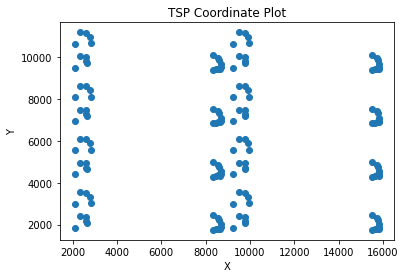

In [10]:
plot_graph(testes[23])

### Podemos ver o resultado do algoritmo

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance
from itertools import combinations

def print_tour(coord_list, tour,nome):
    # Para visualizar o resultado
    G = create_complete_graph(coord_list)
    pos = {i: coord_list[i] for i in range(len(coord_list))}
    plt.plot([coord_list[i][0] for i in tour], [coord_list[i][1] for i in tour], linestyle='-', marker='o', markersize=1, color='darkcyan')
    nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=32, node_color='black', font_color='black', edgelist=[])
    plt.savefig(nome+'.png')

    plt.show()

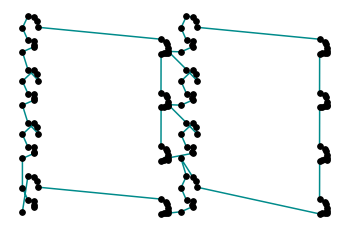

In [54]:
x = 23
tour, tour_length = christofides(testes[x]["vertices"])
print_tour(testes[x]["vertices"], tour, testes[x]["file"])

### Por fim o branch and bound

In [53]:
import networkx as nx
import itertools

def euclidean_distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def total_distance(path, points):
    distance = 0
    for i in range(len(path) - 1):
        distance += euclidean_distance(points[path[i]], points[path[i + 1]])
    distance += euclidean_distance(points[path[-1]], points[path[0]])  # Volta ao ponto inicial
    return distance

def tsp_branch_and_bound(points):
    n = len(points)

    # Criando um grafo completo ponderado usando a distância euclidiana
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=euclidean_distance(points[i], points[j]))

    # Inicializando o melhor caminho como infinito
    best_path = None
    best_distance = float('inf')

    # Inicializando a pilha para o Branch and Bound
    stack = [(0, [0])]  # (Lower Bound, Partial Path)

    while stack:
        lower_bound, partial_path = stack.pop()

        # Se a parcial já contém todos os vértices, atualize o melhor caminho
        if len(partial_path) == n:
            current_distance = total_distance(partial_path, points)
            if current_distance < best_distance:
                best_distance = current_distance
                best_path = partial_path
            continue

        # Gere todas as parciais possíveis para o próximo vértice
        for next_vertex in set(range(n)) - set(partial_path):
            next_lower_bound = lower_bound + G[partial_path[-1]][next_vertex]['weight']
            if next_lower_bound < best_distance:
                stack.append((next_lower_bound, partial_path + [next_vertex]))

    return best_path, best_distance

# Exemplo de uso
points = [(0, 0), (1, 2), (2, 4), (3, 1)]
#points = testes[23]["vertices"] #algoritmo falha pra instancias do trabalho
    
# Encontrar a rota e a distância mínima
best_path, best_distance = tsp_branch_and_bound(points)

print("Melhor Rota:", best_path)
print("Distância Mínima:", best_distance)

Melhor Rota: [0, 3, 2, 1]
Distância Mínima: 10.79669127533634


### Agora testaremos os algoritmos, e geraremos um .csv com os resultados.

In [8]:
import time
import pandas as pd
import psutil  # Importe a biblioteca psutil para medir a quantidade de memória
from memory_profiler import profile

class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException("Tempo de execução excedido")


def medir_tempo_execucao(funcao, limite_tempo, points):
    try:
        inicio = time.time()
        funcao(points)
        fim = time.time()
        tempo_execucao = fim - inicio
        
        # Use o decorador profile para medir a memória
        @profile
        def wrapped_funcao(points):
            return funcao(points)

        tour, tour_lenght = wrapped_funcao(points)
        
        # Adicione a medição da quantidade de memória gasta
        memoria_gasta = psutil.Process().memory_info().rss / 1024 / 1024  # em megabytes
        return tour, tour_lenght, tempo_execucao, memoria_gasta
    except TimeoutException:
        return None, limite_tempo, None, None
    finally:
        pass


def imprimir_resultado(teste, rota, valor, tempo, memoria, algoritmo):
    aproximacao = valor / teste["limite"]
    if rota is not None:
        print(f'Nome do Arquivo: {teste["file"]}')
        print(f'Algoritmo : {algoritmo}')
        print(f'Tempo : {tempo}')
        print(f'Memória Gasta: {memoria} MB')
        print(f'Taxa de Aproximação: {aproximacao}')
        print(f'Rota :{rota}')
        print(f'Vertices :{teste["vertices"]}')
        print(f'Calculado :{True}\n')

def imprimir_resultado_deu_errado(teste, rota, valor, tempo, memoria, algoritmo):
    print(f'Deu errado, calculado :{False}\n')

def adicionar_linha_dataframe(dataframe, teste, rota, valor, tempo, memoria, algoritmo):
    aproximacao = valor / teste["limite"]
    if rota is not None:
        nova_linha = {
            'Nome do Arquivo': teste["file"],
            'Algoritmo': algoritmo,
            'Tempo de execução': tempo,
            'Memória Gasta': memoria,
            'Taxa de Aproximação': aproximacao,
            'Rota': rota,
            'Vertices': teste["vertices"],
            'Calculado': True
        }
        dataframe = dataframe.append(nova_linha, ignore_index=True)
    return dataframe

def adicionar_linha_dataframe_deu_errado(dataframe, teste, rota, valor, tempo, memoria, algoritmo):
    nova_linha = {
        'Nome do Arquivo': teste["file"],
        'Algoritmo': algoritmo,
        'Calculado': False
    }
    dataframe = dataframe.append(nova_linha, ignore_index=True)
    return dataframe

def testar_algoritmo(algoritmo, resultados, testes):
    # Limite de tempo em segundos
    limite_tempo = 250

    # Iterar sobre cada teste, adicionando linhas ao DataFrame
    for i, teste in enumerate(testes):
        try:
            rota = None
            rota, valor, tempo, memoria = medir_tempo_execucao(algoritmo, limite_tempo, testes[i]["vertices"])

            # Chame a função para adicionar a linha ao DataFrame
            resultados = adicionar_linha_dataframe(resultados, teste, rota, valor, tempo, memoria, algoritmo)
            imprimir_resultado(teste, rota, valor, tempo, memoria, algoritmo)

        except Exception as e:
            print(f'Erro no Teste {i + 1}: {str(e)}\n')
            resultados = adicionar_linha_dataframe_deu_errado(resultados, teste, rota, valor, tempo, memoria, algoritmo)
            imprimir_resultado_deu_errado(teste, rota, valor, tempo, memoria, algoritmo)

        resultados.to_csv('twice_around_the_tree.csv', index=False)

    return resultados

# Suponha que você já tenha uma função christofides e uma lista de testes chamada testes

# Importe a biblioteca psutil para medir a quantidade de memória
import psutil

resultados = pd.DataFrame(columns=['Nome do Arquivo', 'Algoritmo', 'Tempo de execução', 'Memória Gasta', 'Taxa de Aproximação', 'Rota', 'Vertices', 'Calculado'])
resultados = testar_algoritmo(twice_around_the_tree, resultados, testes)
resultados = testar_algoritmo(christofides, resultados, testes)
resultados.to_csv('resultados.csv', index=False)

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: eil51
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.05806851387023926
Memória Gasta: 156.73828125 MB
Taxa de Aproximação: 1.4444874678872106
Rota :[1, 22, 27, 48, 6, 8, 26, 31, 28, 3, 20, 35, 36, 23, 7, 43, 24, 51, 46, 12, 47, 4, 17, 37, 15, 44, 42, 19, 40, 41, 13, 45, 33, 18, 14, 25, 32, 11, 38, 5, 9, 49, 10, 39, 50, 16, 2, 21, 29, 34, 30, 1]
Vertices :[(37.0, 52.0), (49.0, 49.0), (52.0, 64.0), (20.0, 26.0), (40.0, 30.0), (21.0, 47.0), (17.0, 63.0), (31.0, 62.0), (52.0, 33.0), (51.0, 21.0), (42.0, 41.0), (31.0, 32.0), (5.0, 25.0), (12.0, 42.0), (36.0, 16.0), (52.0, 41.0), (27.0, 23.0), (17.0, 33.0), (13.0, 13.0), (57.0, 58.0), (62.0, 42.0), (42.0, 57.0), (16.0, 57.0), (8.0, 52.0), (7.0, 38.0), (27.0, 68.0), (30.0, 48.0), (43.0, 67.0), (58.0, 48.0), (58.0, 27.0), (37.0, 69.0), (38.0, 46.0), (46.0, 10.0), (61.0, 33.0), (62.0, 63.0), (63.0, 69.0), (32.0, 22.0), (45.0, 35.0), (59.0, 15.0), (5.0, 6.0), (10.0, 17.0), (21.0, 10.0), (5.0, 64.0),

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: berlin52
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.018707752227783203
Memória Gasta: 157.37109375 MB
Taxa de Aproximação: 1.3794564254469588
Rota :[1, 22, 31, 18, 3, 17, 21, 42, 7, 2, 49, 32, 45, 19, 41, 8, 10, 9, 36, 35, 34, 44, 16, 50, 20, 23, 30, 29, 39, 40, 37, 38, 24, 5, 6, 4, 25, 12, 28, 27, 13, 14, 52, 26, 47, 51, 11, 15, 43, 33, 48, 46, 1]
Vertices :[(565.0, 575.0), (25.0, 185.0), (345.0, 750.0), (945.0, 685.0), (845.0, 655.0), (880.0, 660.0), (25.0, 230.0), (525.0, 1000.0), (580.0, 1175.0), (650.0, 1130.0), (1605.0, 620.0), (1220.0, 580.0), (1465.0, 200.0), (1530.0, 5.0), (845.0, 680.0), (725.0, 370.0), (145.0, 665.0), (415.0, 635.0), (510.0, 875.0), (560.0, 365.0), (300.0, 465.0), (520.0, 585.0), (480.0, 415.0), (835.0, 625.0), (975.0, 580.0), (1215.0, 245.0), (1320.0, 315.0), (1250.0, 400.0), (660.0, 180.0), (410.0, 250.0), (420.0, 555.0), (575.0, 665.0), (1150.0, 1160.0), (700.0, 580.0), (685.0, 595.0), (685.0, 610.0), (77

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: st70
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.04919743537902832
Memória Gasta: 158.0 MB
Taxa de Aproximação: 1.2148934362702117
Rota :[1, 16, 47, 37, 58, 50, 10, 5, 53, 52, 60, 12, 21, 17, 9, 40, 27, 46, 45, 25, 39, 61, 43, 41, 6, 42, 18, 4, 2, 7, 19, 32, 3, 8, 26, 49, 55, 28, 14, 20, 30, 68, 44, 34, 33, 54, 62, 67, 11, 48, 56, 51, 65, 64, 23, 38, 59, 22, 63, 57, 15, 24, 66, 69, 31, 13, 29, 70, 35, 36, 1]
Vertices :[(64.0, 96.0), (80.0, 39.0), (69.0, 23.0), (72.0, 42.0), (48.0, 67.0), (58.0, 43.0), (81.0, 34.0), (79.0, 17.0), (30.0, 23.0), (42.0, 67.0), (7.0, 76.0), (29.0, 51.0), (78.0, 92.0), (64.0, 8.0), (95.0, 57.0), (57.0, 91.0), (40.0, 35.0), (68.0, 40.0), (92.0, 34.0), (62.0, 1.0), (28.0, 43.0), (76.0, 73.0), (67.0, 88.0), (93.0, 54.0), (6.0, 8.0), (87.0, 18.0), (30.0, 9.0), (77.0, 13.0), (78.0, 94.0), (55.0, 3.0), (82.0, 88.0), (73.0, 28.0), (20.0, 55.0), (27.0, 43.0), (95.0, 86.0), (67.0, 99.0), (48.0, 83.0), (75.0, 81.0), (8

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: eil76
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.10492563247680664
Memória Gasta: 158.6484375 MB
Taxa de Aproximação: 1.39270437151361
Rota :[1, 43, 41, 42, 64, 73, 33, 63, 16, 49, 24, 23, 56, 62, 22, 28, 61, 74, 30, 2, 48, 29, 5, 15, 57, 37, 20, 70, 60, 71, 45, 27, 13, 54, 52, 34, 46, 8, 35, 7, 19, 53, 11, 65, 38, 10, 31, 58, 72, 39, 9, 32, 44, 3, 50, 18, 25, 55, 66, 14, 59, 67, 26, 76, 75, 4, 68, 6, 51, 17, 40, 12, 47, 21, 36, 69, 1]
Vertices :[(22.0, 22.0), (36.0, 26.0), (21.0, 45.0), (45.0, 35.0), (55.0, 20.0), (33.0, 34.0), (50.0, 50.0), (55.0, 45.0), (26.0, 59.0), (40.0, 66.0), (55.0, 65.0), (35.0, 51.0), (62.0, 35.0), (62.0, 57.0), (62.0, 24.0), (21.0, 36.0), (33.0, 44.0), (9.0, 56.0), (62.0, 48.0), (66.0, 14.0), (44.0, 13.0), (26.0, 13.0), (11.0, 28.0), (7.0, 43.0), (17.0, 64.0), (41.0, 46.0), (55.0, 34.0), (35.0, 16.0), (52.0, 26.0), (43.0, 26.0), (31.0, 76.0), (22.0, 53.0), (26.0, 29.0), (50.0, 40.0), (55.0, 50.0), (54.0, 10.

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr76
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.10099625587463379
Memória Gasta: 158.8984375 MB
Taxa de Aproximação: 1.3653075106989527
Rota :[1, 2, 3, 4, 6, 5, 10, 9, 12, 11, 17, 18, 37, 36, 35, 34, 40, 41, 60, 59, 58, 57, 63, 64, 71, 72, 73, 61, 62, 38, 39, 13, 14, 74, 15, 16, 20, 19, 31, 30, 29, 26, 27, 28, 33, 32, 43, 42, 54, 53, 52, 49, 50, 51, 56, 55, 66, 65, 7, 8, 23, 22, 21, 25, 24, 46, 45, 44, 48, 47, 69, 68, 67, 70, 75, 76, 1]
Vertices :[(3600.0, 2300.0), (3100.0, 3300.0), (4700.0, 5750.0), (5400.0, 5750.0), (5608.0, 7103.0), (4493.0, 7102.0), (3600.0, 6950.0), (3100.0, 7250.0), (4700.0, 8450.0), (5400.0, 8450.0), (5610.0, 10053.0), (4492.0, 10052.0), (3600.0, 10800.0), (3100.0, 10950.0), (4700.0, 11650.0), (5400.0, 11650.0), (6650.0, 10800.0), (7300.0, 10950.0), (7300.0, 7250.0), (6650.0, 6950.0), (7300.0, 3300.0), (6650.0, 2300.0), (5400.0, 1600.0), (8350.0, 2300.0), (7850.0, 3300.0), (9450.0, 5750.0), (10150.0, 5750.0), (1

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: rat99
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.16449594497680664
Memória Gasta: 159.29296875 MB
Taxa de Aproximação: 1.3761088570801874
Rota :[1, 2, 3, 4, 14, 5, 6, 7, 8, 9, 12, 11, 13, 22, 21, 20, 19, 23, 15, 16, 17, 18, 24, 25, 26, 35, 27, 36, 44, 34, 33, 32, 31, 30, 29, 37, 28, 41, 40, 39, 38, 48, 47, 46, 55, 43, 42, 45, 54, 53, 52, 51, 50, 49, 58, 57, 56, 65, 64, 66, 67, 68, 78, 69, 70, 71, 80, 81, 72, 77, 76, 75, 74, 73, 85, 84, 83, 82, 93, 92, 91, 94, 86, 87, 88, 95, 96, 97, 98, 99, 90, 89, 79, 59, 60, 61, 62, 63, 10, 1]
Vertices :[(6.0, 4.0), (15.0, 15.0), (24.0, 18.0), (33.0, 12.0), (48.0, 12.0), (57.0, 14.0), (67.0, 10.0), (77.0, 10.0), (86.0, 15.0), (6.0, 21.0), (17.0, 26.0), (23.0, 25.0), (32.0, 35.0), (43.0, 23.0), (55.0, 35.0), (65.0, 36.0), (78.0, 39.0), (87.0, 35.0), (3.0, 53.0), (12.0, 44.0), (28.0, 53.0), (33.0, 49.0), (47.0, 46.0), (55.0, 52.0), (64.0, 50.0), (71.0, 57.0), (87.0, 57.0), (4.0, 72.0), (15.0, 78.0), (2

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroA100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.14035439491271973
Memória Gasta: 160.12890625 MB
Taxa de Aproximação: 1.4339320440731342
Rota :[1, 63, 6, 49, 90, 10, 72, 21, 74, 11, 15, 17, 32, 47, 91, 45, 98, 23, 60, 62, 86, 27, 12, 20, 57, 7, 9, 87, 51, 61, 25, 81, 69, 64, 40, 54, 73, 50, 44, 2, 68, 85, 39, 30, 96, 78, 5, 37, 33, 13, 95, 82, 76, 52, 58, 28, 67, 93, 55, 83, 34, 29, 46, 3, 14, 71, 41, 100, 48, 43, 35, 77, 59, 84, 92, 8, 42, 89, 31, 80, 56, 97, 4, 65, 26, 66, 75, 19, 53, 79, 18, 24, 38, 36, 99, 88, 16, 22, 70, 94, 1]
Vertices :[(1380.0, 939.0), (2848.0, 96.0), (3510.0, 1671.0), (457.0, 334.0), (3888.0, 666.0), (984.0, 965.0), (2721.0, 1482.0), (1286.0, 525.0), (2716.0, 1432.0), (738.0, 1325.0), (1251.0, 1832.0), (2728.0, 1698.0), (3815.0, 169.0), (3683.0, 1533.0), (1247.0, 1945.0), (123.0, 862.0), (1234.0, 1946.0), (252.0, 1240.0), (611.0, 673.0), (2576.0, 1676.0), (928.0, 1700.0), (53.0, 857.0), (1807.0, 1711.0), (2

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroB100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.11619138717651367
Memória Gasta: 160.1953125 MB
Taxa de Aproximação: 1.300912660468014
Rota :[1, 90, 21, 95, 98, 12, 71, 27, 9, 25, 46, 61, 35, 94, 57, 7, 84, 58, 52, 43, 50, 55, 22, 23, 88, 77, 16, 2, 13, 63, 31, 48, 51, 78, 17, 41, 45, 36, 96, 92, 19, 44, 42, 14, 64, 82, 33, 15, 6, 4, 83, 24, 18, 89, 87, 60, 74, 66, 54, 34, 32, 59, 76, 99, 8, 29, 97, 91, 28, 3, 11, 93, 85, 73, 53, 70, 39, 40, 67, 5, 62, 26, 69, 75, 30, 49, 86, 68, 10, 80, 20, 38, 100, 56, 81, 79, 47, 65, 37, 72, 1]
Vertices :[(3140.0, 1401.0), (556.0, 1056.0), (3675.0, 1522.0), (1182.0, 1853.0), (3595.0, 111.0), (962.0, 1895.0), (2030.0, 1186.0), (3507.0, 1851.0), (2642.0, 1269.0), (3438.0, 901.0), (3858.0, 1472.0), (2937.0, 1568.0), (376.0, 1018.0), (839.0, 1355.0), (706.0, 1925.0), (749.0, 920.0), (298.0, 615.0), (694.0, 552.0), (387.0, 190.0), (2801.0, 695.0), (3133.0, 1143.0), (1517.0, 266.0), (1538.0, 224.0), (8

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroC100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.17899084091186523
Memória Gasta: 160.578125 MB
Taxa de Aproximação: 1.3317664347002602
Rota :[1, 53, 85, 27, 15, 13, 79, 64, 20, 55, 42, 67, 31, 47, 6, 54, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 38, 56, 5, 43, 86, 71, 72, 50, 95, 94, 91, 70, 23, 21, 89, 41, 59, 3, 73, 35, 2, 68, 30, 76, 83, 62, 39, 65, 80, 77, 40, 12, 46, 29, 18, 49, 93, 4, 60, 99, 19, 92, 10, 36, 14, 57, 74, 69, 100, 33, 45, 81, 97, 37, 16, 63, 44, 66, 48, 84, 11, 52, 96, 87, 51, 61, 26, 78, 9, 82, 7, 32, 24, 1]
Vertices :[(1357.0, 1905.0), (2650.0, 802.0), (1774.0, 107.0), (1307.0, 964.0), (3806.0, 746.0), (2687.0, 1353.0), (43.0, 1957.0), (3092.0, 1668.0), (185.0, 1542.0), (834.0, 629.0), (40.0, 462.0), (1183.0, 1391.0), (2048.0, 1628.0), (1097.0, 643.0), (1838.0, 1732.0), (234.0, 1118.0), (3314.0, 1881.0), (737.0, 1285.0), (779.0, 777.0), (2312.0, 1949.0), (2576.0, 189.0), (3078.0, 1541.0), (2781.0, 478.0), (70

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroD100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.18412041664123535
Memória Gasta: 160.86328125 MB
Taxa de Aproximação: 1.3430581535248216
Rota :[1, 27, 24, 41, 84, 15, 63, 16, 96, 86, 65, 14, 68, 33, 45, 99, 31, 57, 72, 78, 80, 76, 54, 77, 43, 71, 4, 44, 60, 53, 5, 62, 37, 19, 92, 51, 35, 100, 2, 48, 30, 93, 64, 59, 40, 6, 83, 3, 85, 18, 25, 20, 9, 10, 21, 47, 12, 28, 56, 95, 55, 26, 87, 82, 91, 39, 73, 69, 88, 79, 13, 50, 34, 38, 11, 90, 17, 94, 32, 97, 89, 70, 49, 98, 66, 8, 52, 46, 23, 42, 22, 58, 29, 36, 67, 75, 7, 74, 61, 81, 1]
Vertices :[(2995.0, 264.0), (202.0, 233.0), (981.0, 848.0), (1346.0, 408.0), (781.0, 670.0), (1009.0, 1001.0), (2927.0, 1777.0), (2982.0, 949.0), (555.0, 1121.0), (464.0, 1302.0), (3452.0, 637.0), (571.0, 1982.0), (2656.0, 128.0), (1623.0, 1723.0), (2067.0, 694.0), (1725.0, 927.0), (3600.0, 459.0), (1109.0, 1196.0), (366.0, 339.0), (778.0, 1282.0), (386.0, 1616.0), (3918.0, 1217.0), (3332.0, 1049.0), (25

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroE100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.1538524627685547
Memória Gasta: 161.3671875 MB
Taxa de Aproximação: 1.4037783073863785
Rota :[1, 74, 21, 7, 76, 12, 32, 58, 63, 88, 35, 40, 99, 17, 84, 45, 54, 25, 97, 65, 8, 80, 10, 60, 50, 57, 31, 9, 66, 30, 90, 42, 5, 48, 33, 22, 39, 43, 19, 94, 18, 24, 29, 100, 86, 38, 68, 93, 91, 55, 6, 34, 37, 70, 85, 77, 96, 4, 2, 11, 82, 27, 41, 75, 13, 87, 67, 92, 53, 78, 64, 23, 56, 15, 20, 49, 62, 95, 36, 28, 59, 98, 51, 69, 83, 47, 3, 46, 73, 16, 61, 14, 44, 72, 52, 71, 89, 81, 79, 26, 1]
Vertices :[(3477.0, 949.0), (91.0, 1732.0), (3972.0, 329.0), (198.0, 1632.0), (1806.0, 733.0), (538.0, 1023.0), (3430.0, 1088.0), (2186.0, 766.0), (1513.0, 1646.0), (2143.0, 1611.0), (53.0, 1657.0), (3404.0, 1307.0), (1034.0, 1344.0), (2823.0, 376.0), (3104.0, 1931.0), (3232.0, 324.0), (2790.0, 1457.0), (374.0, 9.0), (741.0, 146.0), (3083.0, 1938.0), (3502.0, 1067.0), (1280.0, 237.0), (3326.0, 1846.0), (21

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: rd100
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.21652841567993164
Memória Gasta: 161.60546875 MB
Taxa de Aproximação: 1.3232857181286048
Rota :[1, 18, 62, 15, 63, 97, 67, 13, 86, 21, 49, 75, 4, 32, 78, 20, 74, 26, 9, 33, 3, 10, 27, 92, 50, 46, 19, 37, 28, 77, 59, 95, 93, 56, 73, 54, 38, 72, 17, 70, 79, 6, 53, 94, 98, 16, 45, 44, 29, 35, 100, 52, 66, 31, 84, 23, 2, 89, 88, 76, 58, 99, 47, 57, 36, 64, 82, 85, 12, 14, 87, 60, 8, 69, 90, 51, 65, 80, 48, 30, 81, 5, 22, 41, 34, 7, 40, 55, 39, 96, 42, 43, 24, 25, 61, 11, 91, 83, 68, 71, 1]
Vertices :[(143.775, 862.63), (881.78, 1.18319), (545.244, 735.005), (502.813, 876.001), (204.876, 345.225), (701.637, 576.987), (147.167, 164.286), (135.382, 807.91), (628.999, 976.971), (674.999, 731.447), (313.696, 299.126), (445.689, 981.97), (354.793, 765.215), (398.129, 976.034), (273.041, 853.944), (666.295, 312.27), (876.942, 925.39), (134.026, 949.816), (966.825, 726.799), (659.346, 889.08), (400.

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: eil101
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.5080208778381348
Memória Gasta: 161.6875 MB
Taxa de Aproximação: 1.408762408506762
Rota :[1, 50, 76, 77, 3, 79, 33, 81, 9, 51, 71, 35, 65, 78, 34, 68, 29, 24, 80, 12, 26, 40, 21, 73, 72, 74, 22, 41, 75, 56, 4, 23, 39, 67, 58, 13, 94, 6, 89, 95, 97, 87, 2, 57, 15, 43, 42, 92, 37, 98, 100, 59, 99, 5, 60, 18, 52, 83, 8, 45, 46, 82, 7, 88, 31, 70, 30, 20, 66, 62, 10, 90, 32, 63, 48, 47, 19, 11, 36, 49, 64, 84, 17, 93, 85, 61, 16, 44, 14, 38, 86, 91, 96, 53, 101, 27, 28, 54, 55, 25, 69, 1]
Vertices :[(41.0, 49.0), (35.0, 17.0), (55.0, 45.0), (55.0, 20.0), (15.0, 30.0), (25.0, 30.0), (20.0, 50.0), (10.0, 43.0), (55.0, 60.0), (30.0, 60.0), (20.0, 65.0), (50.0, 35.0), (30.0, 25.0), (15.0, 10.0), (30.0, 5.0), (10.0, 20.0), (5.0, 30.0), (20.0, 40.0), (15.0, 60.0), (45.0, 65.0), (45.0, 20.0), (45.0, 10.0), (55.0, 5.0), (65.0, 35.0), (65.0, 20.0), (45.0, 30.0), (35.0, 40.0), (41.0, 37.0), (64.0, 42

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: lin105
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.713402271270752
Memória Gasta: 161.6875 MB
Taxa de Aproximação: 1.4957957924154182
Rota :[1, 2, 3, 8, 9, 5, 4, 13, 14, 34, 35, 38, 39, 6, 7, 10, 11, 15, 103, 20, 12, 23, 24, 19, 16, 18, 17, 25, 26, 36, 37, 27, 28, 33, 104, 40, 45, 48, 49, 50, 55, 56, 57, 54, 51, 47, 44, 41, 43, 42, 46, 52, 53, 58, 59, 105, 62, 63, 69, 73, 76, 77, 72, 79, 84, 83, 82, 78, 71, 68, 67, 64, 85, 91, 92, 93, 98, 99, 96, 97, 101, 102, 86, 80, 74, 70, 66, 65, 61, 60, 87, 88, 94, 95, 100, 75, 81, 89, 90, 21, 22, 29, 30, 31, 32, 1]
Vertices :[(63.0, 71.0), (94.0, 71.0), (142.0, 370.0), (173.0, 1276.0), (205.0, 1213.0), (213.0, 69.0), (244.0, 69.0), (276.0, 630.0), (283.0, 732.0), (362.0, 69.0), (394.0, 69.0), (449.0, 370.0), (480.0, 1276.0), (512.0, 1213.0), (528.0, 157.0), (583.0, 630.0), (591.0, 732.0), (638.0, 654.0), (638.0, 496.0), (638.0, 314.0), (638.0, 142.0), (669.0, 142.0), (677.0, 315.0), (677.0, 496.0)

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr107
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 1.2029519081115723
Memória Gasta: 161.6328125 MB
Taxa de Aproximação: 1.248744641618589
Rota :[1, 3, 4, 6, 5, 2, 7, 9, 10, 11, 8, 12, 13, 15, 16, 18, 17, 14, 20, 23, 24, 21, 19, 22, 26, 29, 30, 27, 25, 28, 31, 33, 34, 36, 35, 32, 37, 39, 40, 42, 41, 38, 44, 47, 48, 45, 43, 46, 49, 51, 52, 54, 53, 50, 55, 106, 104, 101, 56, 99, 102, 103, 100, 98, 95, 97, 96, 57, 94, 91, 58, 89, 86, 59, 84, 81, 60, 79, 76, 61, 74, 73, 62, 70, 71, 72, 69, 68, 65, 67, 66, 63, 64, 77, 78, 75, 82, 83, 80, 87, 88, 85, 92, 93, 90, 107, 105, 1]
Vertices :[(8375.0, 4700.0), (8775.0, 4700.0), (8375.0, 4900.0), (8175.0, 4900.0), (8775.0, 4900.0), (8575.0, 4900.0), (8775.0, 5400.0), (8375.0, 5450.0), (8775.0, 5600.0), (8575.0, 5600.0), (8375.0, 5650.0), (8175.0, 5650.0), (8375.0, 6200.0), (8775.0, 6200.0), (8375.0, 6400.0), (8175.0, 6400.0), (8775.0, 6400.0), (8575.0, 6400.0), (8375.0, 7000.0), (8775.0, 7000.0), (8375.

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr124
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.08040857315063477
Memória Gasta: 161.78125 MB
Taxa de Aproximação: 1.424818368214969
Rota :[1, 2, 3, 4, 8, 7, 27, 28, 29, 35, 36, 59, 33, 34, 30, 31, 32, 6, 5, 61, 60, 58, 57, 56, 55, 37, 38, 24, 25, 26, 40, 39, 23, 21, 20, 19, 18, 45, 44, 43, 42, 41, 54, 52, 46, 17, 16, 9, 10, 47, 48, 49, 15, 14, 11, 12, 13, 50, 51, 53, 88, 87, 86, 85, 90, 91, 101, 89, 103, 102, 114, 113, 112, 111, 110, 109, 108, 104, 107, 106, 105, 22, 62, 66, 65, 64, 63, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 92, 93, 94, 95, 96, 97, 98, 99, 100, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 67, 83, 82, 81, 84, 1]
Vertices :[(4475.0, 8657.0), (4475.0, 8969.0), (4475.0, 9407.0), (4475.0, 9719.0), (5450.0, 10475.0), (5475.0, 9750.0), (5475.0, 8650.0), (4575.0, 8425.0), (5425.0, 3300.0), (5425.0, 3000.0), (5425.0, 2400.0), (5425.0, 2100.0), (5425.0, 1800.0), (6000.0, 2375.0), (6375.0, 2375.0), (6000.0, 33

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)
C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: bier127
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.20325422286987305
Memória Gasta: 162.01953125 MB
Taxa de Aproximação: 1.3109093218844219
Rota :[1, 7, 105, 106, 6, 24, 9, 11, 23, 4, 22, 19, 72, 8, 21, 17, 18, 74, 73, 67, 68, 71, 70, 69, 110, 109, 87, 86, 85, 88, 96, 119, 63, 77, 79, 80, 78, 76, 75, 117, 84, 81, 126, 82, 83, 102, 101, 108, 20, 15, 114, 120, 10, 3, 90, 116, 60, 62, 59, 61, 91, 58, 64, 113, 65, 125, 89, 92, 99, 104, 100, 13, 50, 5, 52, 124, 55, 47, 53, 49, 118, 46, 94, 112, 111, 107, 48, 66, 56, 121, 51, 2, 57, 54, 45, 44, 103, 93, 95, 123, 97, 98, 127, 115, 16, 37, 35, 36, 41, 14, 12, 30, 27, 31, 43, 34, 39, 38, 26, 25, 33, 29, 32, 122, 28, 42, 40, 1]
Vertices :[(9860.0, 14152.0), (9396.0, 14616.0), (11252.0, 14848.0), (11020.0, 13456.0), (9512.0, 15776.0), (10788.0, 13804.0), (10208.0, 14384.0), (11600.0, 13456.0), (11252.0, 14036.0), (10672.0, 15080.0), (11136.0, 14152.0), (9860.0, 13108.0), (10092.0, 14964.0), (9512

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr136
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.12303638458251953
Memória Gasta: 163.234375 MB
Taxa de Aproximação: 1.4070183796934417
Rota :[1, 6, 5, 7, 8, 17, 19, 31, 28, 27, 32, 20, 16, 2, 29, 30, 18, 38, 40, 39, 52, 41, 42, 51, 53, 65, 62, 61, 66, 54, 50, 37, 63, 64, 72, 74, 73, 75, 76, 84, 86, 99, 96, 95, 100, 87, 83, 71, 88, 94, 93, 101, 89, 82, 70, 78, 77, 79, 80, 92, 91, 102, 90, 81, 69, 68, 56, 47, 35, 57, 58, 67, 55, 48, 36, 33, 21, 14, 3, 10, 9, 15, 11, 12, 4, 13, 22, 34, 24, 23, 25, 26, 44, 43, 45, 46, 59, 60, 49, 104, 112, 111, 113, 114, 116, 123, 134, 126, 125, 133, 124, 115, 103, 127, 128, 122, 105, 110, 109, 106, 108, 107, 118, 120, 136, 130, 129, 131, 132, 119, 117, 121, 135, 97, 98, 85, 1]
Vertices :[(5300.0, 1965.0), (7275.0, 1965.0), (12450.0, 1965.0), (14425.0, 1965.0), (4118.0, 2275.0), (4743.0, 2275.0), (5935.0, 2275.0), (6560.0, 2275.0), (11268.0, 2275.0), (11893.0, 2275.0), (13085.0, 2275.0), (13710.0, 2275.0)

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr144
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.08008384704589844
Memória Gasta: 163.67578125 MB
Taxa de Aproximação: 1.344803933702226
Rota :[1, 2, 28, 29, 30, 27, 26, 35, 36, 25, 24, 23, 22, 37, 38, 39, 40, 21, 18, 17, 41, 42, 16, 15, 14, 13, 20, 19, 8, 7, 9, 10, 11, 12, 46, 47, 48, 59, 60, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 83, 82, 81, 80, 79, 84, 85, 86, 110, 109, 108, 107, 106, 105, 104, 88, 87, 103, 102, 101, 100, 99, 90, 89, 78, 77, 76, 75, 74, 73, 98, 97, 96, 95, 94, 93, 92, 91, 115, 131, 132, 133, 134, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 111, 112, 113, 114, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 71, 45, 44, 43, 34, 33, 32, 31, 3, 4, 5, 6, 1]
Vertices :[(4350.0, 4425.0), (4500.0, 4425.0), (4300.0, 4725.0), (4300.0, 4825.0), (4300.0, 4950.0), (4300.0, 5050.0), (4350.0, 8875.0), (4500.0, 8875.0), (4300.0, 9175.0), (4300.0, 9275.0),

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: ch150
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.16273856163024902
Memória Gasta: 164.58984375 MB
Taxa de Aproximação: 1.4096909672125577
Rota :[1, 87, 76, 73, 48, 63, 30, 84, 7, 8, 89, 96, 35, 93, 124, 97, 100, 5, 107, 95, 82, 143, 126, 33, 92, 54, 46, 90, 138, 134, 105, 111, 16, 59, 15, 78, 79, 121, 88, 94, 10, 113, 3, 62, 149, 125, 22, 133, 77, 122, 14, 80, 72, 49, 147, 144, 129, 27, 31, 145, 112, 64, 136, 74, 13, 106, 91, 119, 68, 128, 45, 4, 104, 71, 44, 115, 150, 21, 123, 131, 32, 23, 38, 67, 43, 109, 51, 20, 25, 110, 47, 120, 42, 9, 6, 28, 37, 2, 19, 99, 114, 102, 139, 40, 53, 24, 12, 116, 101, 41, 57, 39, 117, 140, 118, 127, 69, 36, 61, 11, 148, 130, 60, 66, 17, 81, 29, 86, 135, 50, 58, 55, 65, 132, 141, 83, 56, 26, 75, 18, 142, 85, 146, 137, 70, 108, 52, 98, 34, 103, 1]
Vertices :[(37.4393516691, 541.2090699418), (612.1759508571, 494.3166877396), (38.1312338227, 353.1484581781), (53.4418081065, 131.484901365), (143.0606355347,

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroA150
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.3412139415740967
Memória Gasta: 166.921875 MB
Taxa de Aproximação: 1.4614157666060303
Rota :[1, 130, 92, 8, 42, 89, 133, 138, 122, 80, 31, 139, 56, 143, 97, 4, 65, 66, 124, 26, 129, 118, 75, 19, 53, 134, 79, 106, 90, 10, 72, 21, 74, 11, 15, 17, 32, 109, 47, 131, 93, 28, 105, 67, 108, 58, 61, 25, 81, 125, 51, 87, 145, 9, 7, 57, 20, 12, 27, 86, 35, 150, 62, 60, 77, 110, 149, 55, 83, 34, 120, 115, 123, 43, 3, 14, 71, 41, 100, 48, 46, 29, 132, 112, 107, 121, 30, 101, 39, 96, 78, 5, 37, 103, 146, 33, 13, 95, 126, 82, 116, 50, 44, 114, 144, 2, 64, 40, 54, 73, 68, 85, 69, 76, 147, 52, 136, 128, 117, 140, 135, 142, 148, 91, 45, 98, 23, 141, 59, 127, 113, 84, 49, 6, 63, 137, 18, 24, 38, 36, 104, 102, 99, 111, 88, 16, 22, 70, 94, 119, 1]
Vertices :[(1380.0, 939.0), (2848.0, 96.0), (3510.0, 1671.0), (457.0, 334.0), (3888.0, 666.0), (984.0, 965.0), (2721.0, 1482.0), (1286.0, 525.0), (2716.0, 1432.

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroB150
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.34366512298583984
Memória Gasta: 166.921875 MB
Taxa de Aproximação: 1.3506455846872634
Rota :[1, 53, 85, 27, 15, 13, 79, 110, 64, 20, 55, 42, 67, 31, 47, 130, 65, 147, 80, 77, 115, 104, 149, 6, 54, 134, 75, 22, 112, 8, 106, 17, 25, 90, 34, 114, 108, 113, 145, 109, 58, 98, 148, 88, 28, 38, 71, 124, 72, 83, 62, 138, 126, 133, 50, 86, 95, 94, 123, 91, 70, 102, 21, 122, 89, 41, 59, 3, 73, 118, 23, 35, 2, 68, 30, 111, 121, 76, 129, 139, 131, 101, 56, 119, 5, 43, 39, 107, 40, 12, 46, 125, 137, 142, 29, 18, 49, 93, 143, 4, 60, 140, 116, 14, 36, 57, 74, 69, 100, 33, 45, 81, 97, 144, 136, 141, 10, 92, 99, 19, 105, 37, 120, 16, 63, 44, 66, 103, 48, 84, 11, 52, 150, 87, 96, 128, 51, 127, 135, 146, 132, 32, 24, 117, 61, 26, 78, 9, 82, 7, 1]
Vertices :[(1357.0, 1905.0), (2650.0, 802.0), (1774.0, 107.0), (1307.0, 964.0), (3806.0, 746.0), (2687.0, 1353.0), (43.0, 1957.0), (3092.0, 1668.0), (185.0, 15

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr152
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.09047675132751465
Memória Gasta: 167.0859375 MB
Taxa de Aproximação: 1.255039844166789
Rota :[1, 35, 36, 34, 16, 2, 15, 3, 31, 30, 29, 14, 4, 13, 5, 26, 25, 24, 12, 6, 11, 7, 20, 21, 19, 10, 8, 9, 17, 18, 40, 22, 23, 39, 27, 28, 38, 45, 54, 69, 70, 71, 72, 53, 52, 46, 79, 91, 78, 92, 95, 94, 93, 77, 74, 75, 73, 51, 47, 76, 50, 49, 48, 96, 115, 116, 97, 98, 99, 90, 80, 89, 81, 67, 66, 65, 57, 43, 68, 56, 55, 44, 101, 102, 103, 88, 82, 87, 83, 63, 62, 61, 60, 41, 64, 59, 58, 42, 105, 106, 107, 86, 84, 85, 108, 109, 110, 104, 111, 112, 100, 113, 114, 121, 120, 133, 134, 146, 145, 144, 135, 136, 119, 118, 137, 138, 143, 142, 141, 139, 140, 117, 132, 131, 147, 148, 149, 130, 129, 122, 123, 128, 127, 151, 150, 152, 126, 125, 124, 32, 33, 37, 1]
Vertices :[(2100.0, 1850.0), (2100.0, 3000.0), (2100.0, 4400.0), (2100.0, 5550.0), (2100.0, 6950.0), (2100.0, 8100.0), (2100.0, 9500.0), (2100.0, 10650

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: u159
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.404998779296875
Memória Gasta: 167.1015625 MB
Taxa de Aproximação: 1.3030382379061427
Rota :[1, 159, 2, 3, 4, 5, 153, 6, 152, 7, 8, 9, 10, 148, 147, 146, 144, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 22, 24, 25, 27, 26, 28, 31, 30, 29, 32, 143, 142, 141, 139, 137, 138, 37, 35, 34, 33, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 75, 74, 76, 73, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 63, 54, 53, 72, 78, 79, 80, 81, 82, 83, 84, 85, 86, 97, 87, 88, 89, 90, 91, 92, 93, 94, 96, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 77, 122, 121, 120, 117, 110, 109, 108, 111, 112, 113, 116, 115, 114, 118, 119, 123, 135, 136, 133, 134, 132, 131, 128, 127, 126, 125, 129, 124, 130, 140, 145, 149, 150, 151, 154, 155, 156, 157, 158, 1]
Vertices :[(3300.0, 2200.0), (3500.0, 2900.0), (3300.0, 2900.0), (3500.0, 3100.0), (3500.0, 3300.0), (3300.0, 3500.0),

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: rat195
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.5396320819854736
Memória Gasta: 168.0390625 MB
Taxa de Aproximação: 1.4055437085533715
Rota :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 17, 16, 15, 14, 28, 27, 29, 30, 31, 32, 33, 46, 45, 44, 43, 42, 41, 40, 53, 54, 55, 56, 57, 58, 59, 71, 72, 73, 74, 75, 62, 61, 60, 63, 64, 65, 76, 77, 78, 89, 88, 90, 91, 85, 84, 83, 82, 81, 80, 79, 66, 67, 68, 69, 70, 97, 96, 95, 94, 93, 92, 105, 107, 106, 98, 99, 100, 101, 102, 103, 104, 111, 112, 113, 114, 115, 116, 117, 127, 126, 125, 124, 123, 122, 121, 108, 109, 110, 128, 129, 130, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 120, 119, 118, 132, 131, 145, 144, 147, 146, 160, 159, 158, 157, 172, 171, 170, 185, 184, 183, 186, 187, 188, 189, 190, 173, 174, 175, 176, 177, 178, 179, 180, 167, 168, 169, 181, 182, 192, 191, 193, 194, 195, 148, 149, 150, 151, 152, 153, 154, 155, 156, 166, 165, 164, 163, 162, 161, 143, 86, 87, 47, 48, 49, 20

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: d198
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.7633907794952393
Memória Gasta: 166.96875 MB
Taxa de Aproximação: 1.2203761108454545
Rota :[1, 2, 7, 6, 3, 4, 5, 8, 9, 10, 11, 12, 13, 41, 40, 15, 14, 16, 17, 57, 42, 43, 56, 55, 44, 59, 60, 68, 67, 70, 66, 61, 54, 45, 62, 53, 46, 52, 47, 39, 34, 33, 36, 37, 32, 30, 28, 27, 26, 25, 24, 21, 20, 19, 18, 22, 23, 29, 31, 38, 35, 51, 50, 48, 49, 63, 64, 78, 77, 76, 81, 80, 79, 92, 91, 65, 74, 83, 82, 75, 89, 90, 96, 95, 94, 93, 101, 102, 103, 104, 105, 114, 113, 112, 106, 107, 111, 110, 109, 108, 167, 168, 116, 115, 122, 117, 118, 119, 120, 124, 125, 126, 130, 129, 127, 128, 171, 172, 190, 189, 191, 188, 183, 181, 177, 175, 174, 173, 176, 178, 179, 194, 195, 198, 197, 196, 180, 184, 185, 187, 192, 193, 186, 182, 170, 131, 132, 134, 138, 139, 140, 142, 147, 146, 143, 145, 144, 137, 150, 151, 163, 164, 165, 166, 148, 153, 152, 149, 162, 161, 160, 159, 158, 157, 156, 155, 154, 133, 135, 136, 141,

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroA200
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.7998037338256836
Memória Gasta: 168.984375 MB
Taxa de Aproximação: 1.3700372386085928
Rota :[1, 53, 111, 115, 117, 132, 40, 147, 12, 85, 145, 191, 27, 198, 123, 15, 13, 79, 160, 162, 64, 20, 55, 42, 135, 186, 127, 112, 120, 47, 31, 67, 157, 107, 75, 183, 22, 8, 134, 155, 109, 6, 54, 187, 151, 161, 80, 77, 158, 128, 60, 101, 4, 163, 93, 106, 149, 99, 19, 92, 10, 175, 36, 14, 192, 108, 142, 69, 189, 131, 180, 57, 74, 100, 33, 45, 81, 97, 197, 156, 119, 190, 49, 18, 110, 29, 184, 37, 124, 118, 16, 63, 51, 194, 188, 44, 153, 66, 116, 122, 170, 84, 11, 52, 166, 165, 96, 126, 87, 104, 48, 179, 138, 9, 78, 82, 61, 136, 26, 199, 7, 32, 24, 159, 174, 121, 46, 172, 167, 41, 59, 3, 73, 89, 193, 125, 181, 2, 35, 169, 23, 164, 140, 21, 154, 173, 150, 91, 94, 95, 182, 195, 113, 133, 176, 144, 70, 76, 102, 168, 185, 50, 139, 86, 62, 83, 72, 130, 71, 38, 28, 39, 148, 88, 98, 58, 171, 141, 200, 114, 10

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: kroB200
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.5386455059051514
Memória Gasta: 174.3203125 MB
Taxa de Aproximação: 1.3798928762053815
Rota :[1, 90, 21, 108, 152, 146, 46, 25, 9, 166, 138, 86, 49, 134, 181, 30, 75, 150, 69, 101, 100, 26, 62, 56, 80, 20, 38, 123, 10, 68, 111, 190, 117, 40, 39, 70, 149, 170, 53, 198, 194, 132, 5, 197, 67, 189, 142, 95, 174, 12, 107, 161, 71, 27, 176, 61, 35, 172, 157, 131, 178, 199, 145, 66, 133, 168, 114, 87, 165, 60, 186, 196, 43, 89, 185, 118, 159, 50, 164, 140, 106, 183, 103, 16, 2, 109, 42, 110, 120, 125, 14, 64, 82, 121, 147, 33, 15, 6, 4, 83, 182, 112, 128, 155, 13, 126, 63, 31, 48, 195, 156, 51, 187, 78, 17, 45, 36, 119, 92, 151, 19, 135, 137, 96, 162, 200, 102, 44, 130, 192, 41, 148, 77, 105, 18, 24, 153, 160, 144, 104, 55, 171, 22, 23, 88, 143, 177, 154, 163, 54, 115, 37, 72, 184, 141, 65, 124, 127, 188, 79, 113, 81, 179, 47, 116, 52, 58, 84, 7, 169, 191, 139, 173, 193, 74, 180, 94, 57, 34, 

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: ts225
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.19444799423217773
Memória Gasta: 175.7734375 MB
Taxa de Aproximação: 1.428570566601069
Rota :[1, 2, 126, 127, 128, 129, 130, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 150, 171, 172, 173, 174, 175, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 155, 154, 153, 152, 176, 177, 178, 179, 160, 181, 165, 186, 187, 188, 189, 190, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 180, 201, 202, 203, 204, 205, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 210, 185, 184, 183, 182, 206, 207, 208, 209, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 221, 222, 223, 224, 225, 125, 124, 123, 122, 121, 195, 216, 217, 218, 219, 220, 119, 120, 211, 212, 213, 214, 215, 113, 114, 115, 116, 117, 118, 170, 169, 168, 167, 191, 192, 193, 194, 196, 197, 198, 199, 145, 166, 140, 161,

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: tsp225
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.6761283874511719
Memória Gasta: 172.47265625 MB
Taxa de Aproximação: 1.3169525951635492
Rota :[1, 3, 198, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 203, 19, 18, 22, 21, 23, 24, 208, 25, 26, 34, 33, 35, 30, 29, 28, 204, 77, 78, 79, 97, 96, 95, 80, 81, 209, 94, 93, 92, 91, 90, 87, 210, 84, 83, 82, 85, 86, 131, 211, 130, 222, 129, 128, 127, 126, 125, 132, 89, 88, 221, 99, 98, 100, 101, 102, 103, 104, 220, 105, 106, 107, 108, 109, 217, 219, 216, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 63, 62, 61, 60, 59, 2, 47, 225, 189, 27, 188, 190, 133, 199, 191, 192, 196, 193, 218, 45, 48, 194, 46, 44, 43, 42, 195, 205, 224, 207, 49, 51, 50, 57, 56, 55, 52, 53, 54, 58, 64, 112, 111, 110, 113, 114, 115, 118, 119, 185, 120, 175, 121, 122, 123, 124, 170, 169, 168, 212, 150, 149, 148, 147, 146, 145, 153, 154, 155, 156, 157, 144, 143, 201, 142, 141, 140, 139, 138, 137, 136, 183, 135, 134, 215

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr226
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.5515711307525635
Memória Gasta: 172.12109375 MB
Taxa de Aproximação: 1.4240039277780465
Rota :[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 71, 68, 69, 70, 66, 103, 105, 104, 106, 107, 108, 109, 110, 118, 126, 119, 120, 121, 122, 123, 131, 129, 133, 134, 135, 136, 130, 124, 132, 125, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 127, 128, 117, 116, 115, 114, 113, 112, 111, 72, 16, 17, 18, 19, 20, 51, 50, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 48, 45, 46, 47, 43, 87, 89, 88, 90, 91, 92, 93, 101, 100, 102, 94, 137, 138, 139, 145, 147, 149, 141, 140, 142, 148, 150, 143, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 151,

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: gil262
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 1.161733627319336
Memória Gasta: 170.3125 MB
Taxa de Aproximação: 1.4081298190216074
Rota :[1, 229, 71, 31, 205, 139, 202, 231, 68, 142, 232, 70, 99, 209, 145, 100, 21, 138, 254, 33, 234, 186, 81, 4, 172, 140, 164, 7, 160, 246, 25, 141, 104, 74, 215, 126, 116, 208, 251, 199, 44, 22, 120, 23, 48, 128, 179, 161, 93, 46, 216, 63, 180, 152, 200, 91, 77, 50, 88, 151, 86, 149, 247, 94, 187, 45, 212, 174, 143, 14, 98, 240, 117, 107, 196, 236, 111, 252, 255, 92, 178, 210, 41, 110, 60, 158, 134, 159, 109, 20, 227, 29, 97, 132, 37, 165, 6, 243, 16, 84, 135, 118, 3, 123, 8, 112, 96, 73, 198, 204, 54, 18, 30, 137, 257, 124, 49, 12, 133, 5, 191, 262, 79, 19, 185, 72, 130, 129, 61, 90, 211, 221, 228, 53, 261, 27, 195, 2, 170, 148, 26, 9, 153, 248, 89, 167, 13, 121, 106, 189, 230, 58, 183, 36, 83, 206, 65, 217, 220, 150, 114, 253, 101, 193, 173, 207, 166, 213, 190, 146, 52, 219, 15, 102, 39, 38, 122, 22

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr264
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 0.9761111736297607
Memória Gasta: 174.04296875 MB
Taxa de Aproximação: 1.3492029300196295
Rota :[1, 40, 39, 38, 37, 61, 60, 121, 120, 119, 129, 62, 36, 35, 32, 31, 65, 64, 115, 114, 113, 112, 107, 108, 109, 68, 69, 25, 26, 27, 22, 23, 24, 70, 71, 104, 105, 102, 101, 103, 72, 73, 19, 20, 21, 75, 74, 18, 17, 16, 15, 14, 11, 8, 7, 81, 80, 91, 90, 87, 85, 86, 83, 82, 6, 5, 2, 3, 4, 84, 88, 89, 9, 10, 12, 78, 79, 92, 93, 94, 131, 130, 132, 136, 137, 138, 186, 181, 139, 182, 183, 212, 213, 214, 215, 178, 179, 180, 140, 217, 216, 177, 176, 175, 141, 219, 218, 174, 169, 170, 171, 143, 221, 220, 242, 241, 222, 168, 167, 166, 144, 223, 239, 240, 225, 163, 164, 165, 145, 147, 146, 148, 162, 161, 160, 159, 158, 155, 149, 156, 157, 227, 228, 235, 236, 233, 232, 234, 229, 230, 152, 151, 231, 153, 154, 150, 226, 224, 238, 237, 264, 173, 172, 142, 243, 244, 245, 246, 248, 247, 249, 250, 185, 184, 211, 210

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: a280
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 1.686415672302246
Memória Gasta: 174.09375 MB
Taxa de Aproximação: 1.4627130698326192
Rota :[1, 280, 2, 3, 279, 4, 277, 276, 6, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 275, 274, 273, 272, 271, 16, 17, 18, 133, 132, 19, 20, 21, 128, 127, 126, 125, 30, 31, 29, 28, 27, 26, 22, 25, 23, 24, 32, 33, 34, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 161, 162, 163, 164, 165, 166, 167, 168, 169, 102, 101, 100, 99, 103, 104, 105, 106, 107, 173, 174, 108, 110, 111, 112, 88, 114, 113, 87, 84, 83, 82, 81, 80, 79, 89, 109, 90, 91, 92, 93, 94, 95, 96, 97, 98, 85, 65, 64, 66, 67, 70, 69, 68, 71, 72, 73, 74, 75, 76, 77, 78, 115, 116, 86, 117, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 62, 63, 59, 44, 57, 56, 45, 55, 46, 54, 53, 48, 47, 52, 51, 50, 49, 58, 170, 171, 172, 129, 154, 155, 153, 156, 152, 151, 177, 176, 181, 180, 179, 182, 183, 184, 185, 187, 186, 189, 188, 190, 191, 192, 178, 130, 131

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr299
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 2.062094211578369
Memória Gasta: 180.71875 MB
Taxa de Aproximação: 1.3808637770637335
Rota :[1, 4, 3, 2, 6, 5, 7, 92, 93, 144, 146, 145, 148, 147, 149, 154, 153, 152, 151, 150, 155, 156, 214, 215, 293, 292, 290, 291, 289, 288, 287, 217, 216, 218, 212, 213, 222, 209, 210, 208, 207, 204, 205, 206, 223, 224, 226, 225, 280, 283, 282, 281, 278, 279, 276, 277, 232, 233, 230, 231, 229, 203, 228, 200, 199, 201, 166, 165, 131, 130, 104, 129, 132, 103, 133, 135, 134, 136, 137, 138, 163, 162, 164, 202, 275, 284, 285, 219, 286, 227, 299, 220, 211, 160, 159, 158, 157, 161, 140, 139, 97, 96, 94, 86, 85, 91, 89, 90, 88, 14, 13, 12, 11, 10, 9, 8, 95, 87, 98, 99, 84, 81, 82, 79, 22, 23, 21, 18, 19, 17, 16, 15, 20, 24, 25, 26, 27, 28, 29, 80, 75, 77, 72, 73, 74, 71, 69, 67, 68, 66, 33, 32, 35, 36, 38, 37, 42, 40, 41, 43, 45, 46, 44, 47, 48, 49, 50, 51, 52, 53, 57, 39, 60, 58, 112, 113, 111, 123, 127, 126, 1

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: lin318
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 2.481248617172241
Memória Gasta: 177.95703125 MB
Taxa de Aproximação: 1.3895322233963057
Rota :[1, 2, 3, 8, 9, 6, 7, 10, 11, 15, 103, 20, 12, 23, 28, 27, 24, 19, 16, 18, 17, 25, 26, 36, 37, 42, 43, 41, 44, 47, 48, 45, 40, 104, 49, 316, 317, 50, 55, 56, 59, 105, 62, 63, 61, 60, 164, 161, 160, 155, 153, 150, 145, 38, 35, 34, 137, 136, 135, 134, 127, 126, 208, 120, 116, 13, 14, 115, 112, 111, 4, 5, 107, 106, 108, 113, 114, 110, 109, 216, 212, 211, 213, 218, 219, 215, 214, 223, 224, 244, 245, 248, 249, 217, 220, 221, 118, 119, 225, 313, 230, 222, 233, 238, 237, 234, 229, 226, 228, 227, 235, 236, 246, 247, 243, 231, 232, 239, 240, 241, 242, 139, 140, 143, 144, 250, 255, 258, 259, 260, 265, 264, 261, 257, 254, 251, 253, 252, 256, 262, 263, 268, 267, 266, 269, 165, 166, 170, 171, 281, 278, 277, 274, 288, 292, 293, 294, 289, 287, 282, 286, 283, 279, 284, 280, 276, 275, 271, 270, 318, 297, 298, 30

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: linhp318
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 3.561830520629883
Memória Gasta: 179.3125 MB
Taxa de Aproximação: 1.4125202519560607
Rota :[1, 2, 3, 8, 9, 6, 7, 10, 11, 15, 103, 20, 12, 23, 28, 27, 24, 19, 16, 18, 17, 25, 26, 36, 37, 42, 43, 41, 44, 47, 48, 45, 40, 104, 49, 316, 317, 50, 55, 56, 59, 105, 62, 63, 61, 60, 164, 161, 160, 155, 153, 150, 145, 38, 35, 34, 137, 136, 135, 134, 127, 126, 208, 120, 116, 13, 14, 115, 112, 111, 4, 5, 107, 106, 108, 113, 114, 110, 109, 216, 212, 211, 213, 218, 219, 215, 214, 223, 224, 244, 245, 248, 249, 217, 220, 221, 118, 119, 225, 313, 230, 222, 233, 238, 237, 234, 229, 226, 228, 227, 235, 236, 246, 247, 243, 231, 232, 239, 240, 241, 242, 139, 140, 143, 144, 250, 255, 258, 259, 260, 265, 264, 261, 257, 254, 251, 253, 252, 256, 262, 263, 268, 267, 266, 269, 165, 166, 170, 171, 281, 278, 277, 274, 288, 292, 293, 294, 289, 287, 282, 286, 283, 279, 284, 280, 276, 275, 271, 270, 318, 297, 298, 304,

C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: rd400
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 6.724264144897461
Memória Gasta: 184.859375 MB
Taxa de Aproximação: 1.3728307992779079
Rota :[1, 4, 169, 45, 161, 34, 286, 258, 237, 347, 178, 214, 285, 202, 216, 336, 117, 186, 17, 67, 205, 357, 155, 236, 263, 238, 51, 165, 232, 90, 383, 102, 261, 225, 162, 313, 349, 79, 375, 121, 229, 175, 145, 181, 44, 38, 239, 55, 168, 40, 109, 264, 112, 380, 246, 352, 133, 249, 128, 8, 335, 91, 149, 338, 193, 399, 319, 259, 315, 114, 392, 287, 244, 88, 185, 127, 71, 41, 343, 153, 340, 243, 187, 312, 87, 278, 348, 356, 389, 331, 200, 25, 29, 197, 369, 95, 53, 398, 163, 174, 381, 84, 65, 366, 359, 156, 159, 85, 308, 190, 252, 211, 234, 395, 54, 400, 289, 199, 77, 284, 317, 173, 13, 19, 24, 240, 98, 288, 384, 298, 164, 268, 306, 89, 282, 129, 26, 328, 167, 120, 247, 222, 115, 304, 39, 295, 309, 256, 201, 9, 203, 275, 273, 56, 137, 339, 157, 300, 307, 158, 130, 311, 251, 113, 142, 62, 329, 254, 345, 60, 3

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: fl417
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 2.42504620552063
Memória Gasta: 186.81640625 MB
Taxa de Aproximação: 1.3776709986971958
Rota :[1, 8, 10, 18, 16, 7, 5, 6, 21, 28, 20, 13, 12, 4, 2, 3, 9, 11, 15, 14, 30, 29, 23, 153, 129, 150, 126, 148, 124, 146, 122, 144, 120, 142, 118, 140, 116, 138, 114, 136, 112, 134, 110, 132, 108, 130, 106, 308, 307, 333, 306, 305, 304, 323, 331, 348, 347, 346, 322, 303, 321, 345, 344, 343, 302, 301, 330, 329, 300, 342, 341, 328, 320, 299, 298, 340, 332, 109, 131, 107, 111, 133, 135, 113, 137, 117, 139, 115, 141, 119, 123, 145, 121, 143, 147, 125, 128, 152, 151, 127, 149, 37, 35, 33, 40, 17, 27, 39, 42, 45, 47, 44, 49, 46, 43, 41, 38, 36, 34, 48, 50, 51, 52, 55, 54, 57, 53, 56, 58, 59, 63, 67, 70, 66, 97, 96, 88, 84, 91, 83, 78, 82, 87, 77, 73, 94, 90, 89, 69, 65, 62, 60, 72, 103, 206, 228, 204, 226, 202, 368, 367, 393, 366, 365, 364, 383, 391, 408, 407, 406, 382, 363, 381, 405, 404, 403, 362, 361, 3

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pr439
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 3.3836143016815186
Memória Gasta: 186.82421875 MB
Taxa de Aproximação: 1.363052508128403
Rota :[1, 3, 2, 52, 51, 50, 48, 47, 44, 42, 39, 38, 49, 46, 45, 43, 41, 40, 11, 10, 9, 8, 7, 6, 5, 4, 12, 13, 14, 15, 16, 17, 33, 34, 35, 36, 37, 54, 53, 55, 56, 82, 81, 80, 79, 57, 58, 78, 86, 87, 77, 59, 60, 61, 62, 32, 31, 30, 29, 27, 26, 64, 25, 23, 24, 22, 21, 20, 19, 18, 66, 65, 67, 68, 69, 70, 71, 72, 91, 90, 89, 88, 106, 105, 104, 102, 92, 93, 94, 103, 114, 113, 115, 117, 120, 121, 119, 118, 116, 122, 123, 101, 100, 95, 96, 98, 97, 125, 99, 128, 130, 131, 132, 133, 126, 124, 127, 129, 139, 138, 158, 157, 156, 155, 154, 153, 151, 150, 152, 143, 159, 177, 178, 179, 180, 181, 182, 183, 192, 184, 191, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 175, 161, 160, 162, 134, 135, 136, 137, 163, 164, 165, 166, 169, 170, 168, 167, 176, 205, 206, 207, 171, 172, 174, 173, 208, 216, 215, 

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: pcb442
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 22.216487407684326
Memória Gasta: 194.27734375 MB
Taxa de Aproximação: 1.4680780294276456
Rota :[1, 2, 35, 67, 66, 34, 102, 103, 114, 126, 136, 149, 161, 172, 185, 400, 405, 227, 234, 238, 239, 266, 269, 270, 271, 267, 240, 235, 228, 406, 401, 407, 274, 277, 426, 280, 283, 309, 308, 310, 284, 311, 285, 312, 286, 313, 287, 314, 288, 424, 421, 425, 315, 289, 316, 290, 317, 291, 318, 292, 319, 293, 320, 294, 321, 295, 322, 296, 278, 323, 297, 324, 298, 299, 300, 325, 326, 301, 327, 302, 328, 303, 329, 304, 330, 305, 331, 306, 332, 333, 334, 307, 335, 336, 427, 337, 338, 432, 429, 430, 340, 339, 433, 348, 347, 346, 349, 350, 351, 352, 343, 353, 354, 355, 434, 356, 357, 358, 435, 359, 360, 361, 344, 362, 363, 364, 365, 366, 367, 345, 368, 369, 370, 371, 372, 373, 374, 375, 431, 440, 273, 276, 279, 281, 282, 428, 342, 341, 441, 386, 115, 104, 127, 137, 150, 151, 152, 392, 138, 116, 162, 173, 17

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: d493
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 12.311232328414917
Memória Gasta: 196.7421875 MB
Taxa de Aproximação: 1.304271594238087
Rota :[1, 2, 3, 4, 5, 6, 7, 8, 11, 10, 9, 12, 19, 17, 16, 15, 14, 13, 53, 57, 56, 55, 54, 58, 59, 60, 64, 86, 85, 84, 63, 62, 61, 83, 80, 78, 74, 73, 72, 71, 81, 70, 68, 69, 67, 66, 82, 79, 77, 76, 75, 96, 87, 116, 128, 122, 126, 121, 125, 129, 132, 136, 137, 135, 131, 127, 123, 120, 115, 114, 110, 102, 95, 93, 92, 91, 94, 100, 101, 98, 97, 88, 89, 90, 99, 106, 105, 108, 112, 113, 119, 117, 107, 133, 134, 138, 130, 140, 142, 144, 148, 147, 146, 156, 160, 159, 154, 152, 145, 162, 167, 166, 179, 185, 189, 186, 180, 174, 176, 175, 181, 173, 170, 163, 161, 155, 149, 171, 190, 201, 210, 216, 209, 225, 224, 21, 235, 266, 269, 301, 22, 23, 24, 31, 30, 29, 28, 27, 32, 33, 34, 35, 36, 38, 37, 39, 40, 41, 42, 45, 47, 46, 43, 44, 48, 49, 50, 52, 51, 194, 198, 197, 215, 230, 222, 236, 231, 223, 211, 208, 206, 212, 2

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: u574
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 15.797382831573486
Memória Gasta: 197.37109375 MB
Taxa de Aproximação: 1.351685050219677
Rota :[1, 569, 568, 567, 566, 2, 3, 4, 48, 49, 50, 47, 46, 45, 44, 51, 52, 53, 54, 55, 57, 56, 80, 41, 40, 39, 38, 37, 36, 42, 43, 81, 79, 82, 83, 84, 86, 85, 110, 109, 89, 88, 29, 28, 30, 27, 26, 25, 24, 23, 22, 21, 18, 17, 16, 15, 222, 221, 220, 20, 19, 32, 31, 34, 33, 35, 219, 218, 217, 216, 215, 212, 214, 213, 166, 167, 175, 176, 173, 172, 171, 170, 169, 168, 153, 156, 157, 158, 159, 160, 162, 161, 163, 155, 154, 164, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 209, 208, 232, 233, 234, 231, 229, 228, 227, 226, 225, 224, 223, 241, 230, 235, 236, 237, 240, 239, 206, 205, 204, 243, 242, 244, 245, 246, 203, 247, 202, 248, 249, 201, 200, 199, 198, 197, 195, 194, 190, 189, 193, 191, 192, 196, 250, 251, 253, 252, 254, 519, 518, 517, 516, 515, 474, 470, 467, 466, 465, 464, 463, 460, 458

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: rat575
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 26.02027177810669
Memória Gasta: 189.7421875 MB
Taxa de Aproximação: 1.3848672280268775
Rota :[1, 25, 24, 48, 49, 72, 71, 70, 47, 93, 94, 95, 117, 116, 118, 141, 142, 143, 144, 121, 120, 119, 122, 146, 147, 124, 123, 99, 98, 75, 97, 96, 101, 100, 78, 77, 76, 102, 103, 104, 81, 105, 106, 84, 83, 82, 60, 61, 38, 37, 36, 59, 58, 35, 13, 12, 14, 34, 11, 10, 9, 33, 32, 31, 30, 8, 7, 6, 53, 52, 29, 28, 5, 4, 3, 2, 27, 26, 57, 56, 55, 54, 80, 79, 39, 16, 15, 17, 40, 41, 42, 19, 18, 43, 20, 21, 45, 44, 46, 23, 22, 62, 63, 64, 65, 66, 67, 68, 69, 92, 89, 88, 90, 113, 91, 112, 111, 134, 114, 115, 138, 87, 86, 85, 129, 126, 125, 148, 149, 127, 150, 151, 128, 130, 152, 153, 154, 155, 133, 132, 131, 108, 107, 109, 110, 156, 157, 180, 179, 203, 202, 201, 177, 176, 175, 174, 178, 173, 172, 171, 170, 169, 168, 145, 167, 166, 165, 164, 163, 162, 140, 139, 185, 194, 193, 192, 191, 195, 217, 216, 215, 214, 

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: p654
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 32.161532163619995
Memória Gasta: 202.50390625 MB
Taxa de Aproximação: 1.366563663638392
Rota :[1, 549, 533, 534, 521, 493, 492, 491, 550, 551, 535, 495, 494, 496, 497, 522, 536, 552, 553, 554, 523, 498, 499, 524, 555, 556, 557, 537, 525, 500, 501, 558, 538, 502, 503, 526, 539, 540, 504, 505, 560, 110, 114, 118, 122, 121, 120, 116, 112, 108, 107, 111, 109, 113, 115, 117, 119, 124, 123, 127, 128, 131, 126, 125, 129, 133, 132, 134, 137, 141, 145, 144, 140, 136, 139, 135, 143, 148, 147, 151, 146, 142, 138, 150, 149, 153, 152, 157, 156, 155, 158, 154, 161, 160, 159, 165, 164, 163, 167, 171, 168, 166, 162, 170, 174, 178, 177, 173, 181, 180, 176, 172, 175, 179, 183, 184, 188, 187, 191, 182, 185, 186, 190, 189, 193, 197, 196, 192, 195, 200, 199, 198, 194, 202, 102, 100, 99, 98, 97, 96, 95, 92, 91, 89, 85, 84, 83, 80, 79, 76, 77, 74, 78, 75, 561, 541, 542, 527, 508, 507, 506, 562, 563, 543, 510, 50

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: d657
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 23.43578863143921
Memória Gasta: 181.65625 MB
Taxa de Aproximação: 1.346446796210567
Rota :[1, 2, 3, 4, 5, 11, 10, 8, 34, 33, 25, 22, 15, 16, 17, 18, 14, 19, 20, 23, 30, 28, 27, 26, 24, 441, 442, 444, 447, 448, 31, 32, 38, 35, 39, 43, 47, 59, 71, 91, 105, 106, 122, 44, 48, 52, 63, 57, 68, 77, 83, 97, 101, 108, 107, 113, 123, 144, 154, 159, 151, 167, 168, 152, 112, 111, 124, 135, 147, 177, 193, 189, 176, 84, 90, 89, 88, 96, 110, 128, 125, 506, 507, 126, 136, 153, 505, 127, 503, 500, 496, 493, 490, 485, 489, 488, 486, 481, 482, 487, 491, 497, 498, 495, 492, 483, 473, 484, 472, 499, 494, 515, 516, 519, 518, 517, 514, 513, 504, 502, 501, 508, 134, 137, 509, 510, 511, 160, 183, 174, 184, 195, 201, 202, 203, 190, 175, 161, 194, 204, 206, 213, 214, 581, 230, 247, 258, 280, 593, 307, 298, 281, 274, 259, 267, 297, 303, 296, 282, 266, 279, 286, 283, 268, 257, 245, 212, 234, 275, 273, 250, 278, 292, 2

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(nova_linha, ignore_index=True)


Nome do Arquivo: u724
Algoritmo : <function twice_around_the_tree at 0x00000175464D33A0>
Tempo : 33.613123655319214
Memória Gasta: 193.65625 MB
Taxa de Aproximação: 1.4421622659167244
Rota :[1, 724, 13, 12, 715, 2, 11, 721, 697, 21, 25, 24, 29, 44, 37, 39, 45, 686, 33, 36, 688, 93, 689, 47, 30, 31, 82, 65, 34, 67, 66, 50, 51, 59, 52, 60, 105, 62, 61, 58, 56, 57, 77, 74, 73, 53, 72, 54, 55, 111, 115, 64, 85, 83, 116, 71, 104, 70, 63, 84, 86, 106, 76, 113, 114, 75, 110, 112, 69, 90, 101, 100, 17, 109, 68, 108, 78, 107, 117, 652, 645, 646, 642, 644, 634, 629, 626, 667, 676, 635, 621, 637, 619, 159, 660, 624, 625, 627, 658, 657, 661, 665, 654, 662, 633, 616, 615, 618, 622, 623, 617, 630, 614, 612, 613, 611, 631, 155, 164, 143, 163, 655, 674, 683, 620, 610, 161, 632, 156, 628, 659, 656, 675, 673, 678, 668, 680, 670, 79, 672, 681, 669, 677, 682, 671, 80, 41, 49, 42, 685, 81, 48, 40, 92, 27, 26, 99, 18, 14, 91, 95, 23, 28, 690, 43, 46, 32, 684, 636, 162, 140, 139, 601, 599, 157, 609, 160, 154

ERROR: Could not find file C:\Users\Luiz\AppData\Local\Temp\ipykernel_10012\2576218384.py


KeyboardInterrupt: 

### Pronto! A análise dos dados foi delegada a outro arquivo.